In [1]:
import matplotlib.pyplot as plt
from Graph import Graph
from Queue import Queue
from Stack import Stack
from heuristic_func import *
from searching_algorithms import Astar, DFS, Astar_bonus
from maze_preprocess import Node
from copy import deepcopy
from bonus_wrapper import *

Graph initialized from maze with size 21 x 21


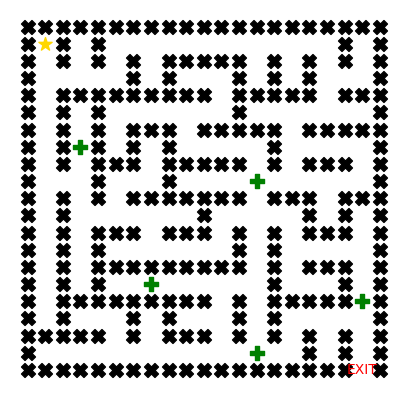

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (7, 3) with point -6
Bonus point at position (x, y) = (9, 13) with point -1
Bonus point at position (x, y) = (16, 19) with point -20
Bonus point at position (x, y) = (15, 7) with point -5


In [2]:
g = Graph('testcases/bonus2.txt')
fs = (5, 5)
g.visualize(figsize=fs)

Với trường hợp có điểm thưởng:
- Xây dựng một đồ thị mới chỉ gồm các điểm thưởng và START, END.
- Tất cả các đỉnh được nối với nhau (đồ thị đủ).
- Trọng số nối giữa các cạnh là khoảng cách heuristic giữa 2 đỉnh đó + số điểm thưởng.
- Tìm đường đi ngắn nhất từ START -> END trên đồ thị này.
- Với danh sách đường đi tìm được, tìm đường đi ngắn nhất thực tế trên mỗi chặng.

In [11]:
g.clear()
Astar_bonus(g, euclide_heuristic)

True

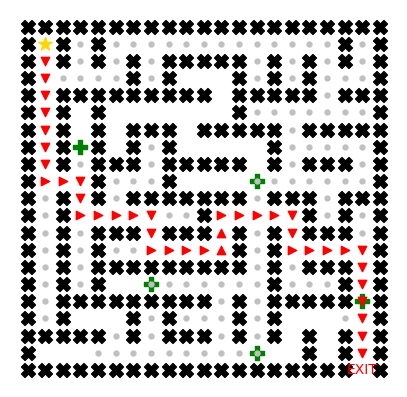

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (7, 3) with point -6
Bonus point at position (x, y) = (9, 13) with point -1
Bonus point at position (x, y) = (16, 19) with point -20
Bonus point at position (x, y) = (15, 7) with point -5


21

In [12]:
visited, path, cost = g.get_visited()
g.visualize(path, visited=visited, figsize=fs)
cost

In [5]:
rg = make_routing_graph(g, euclide_heuristic)

In [6]:
Astar(rg, euclide_heuristic)

True

In [7]:
journey, _ = rg.get_path()

In [8]:
def wrapped_Astar(g, s, e, custom_visited):
    return Astar(g, euclide_heuristic, s, e, custom_visited)

journey_data = bonus_traversal_wrapper(g, wrapped_Astar, journey)

0
Going from (1, 1) to (16, 19)
Result found! Keep going!
81
Going from (16, 19) to (20, 19)
Result found! Keep going!


In [9]:
visited, path, cost = process_journey(g, journey_data)

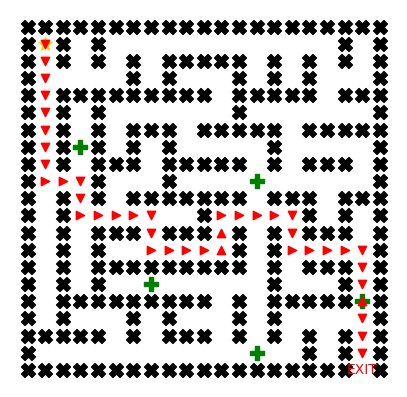

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (7, 3) with point -6
Bonus point at position (x, y) = (9, 13) with point -1
Bonus point at position (x, y) = (16, 19) with point -20
Bonus point at position (x, y) = (15, 7) with point -5


21

In [10]:
g.visualize(path, visited=visited, figsize=fs)
cost